In [1]:
from DataSet import DataSet as ds

In [2]:
from Model import Model as md

Using TensorFlow backend.


Loading ml-1m data set...
Loading Success!
Data Info:
	User Num: 943
	Item Num: 1682
	Data Size: 100000


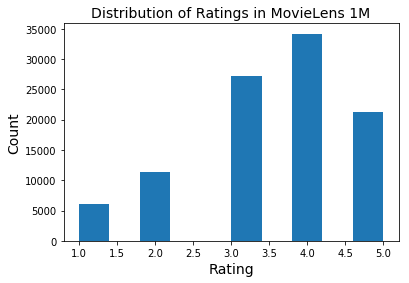

In [2]:
filepath = './Data/ml-1m/ratings.dat'

a = ds(filepath)

In [3]:
import numpy as np
b = np.array(a.train)

In [4]:
import pandas as pd

In [5]:
df = pd.DataFrame(a.data, columns=['user', 'item', 'ratings', 'time'])

In [6]:
df = df.drop(columns=['time'])

In [7]:
shuffled_ratings = df.sample(frac = 1.)
Users = shuffled_ratings['user'].values
print ('Users:', Users, ', shape =', Users.shape)
Movies = shuffled_ratings['item'].values
print ('Movies:', Movies, ', shape =', Movies.shape)
Ratings = shuffled_ratings['ratings'].values
print ('Ratings:', Ratings, ', shape =', Ratings.shape)

Users: [437 597 851 ... 870 896 630] , shape = (100000,)
Movies: [480 742   4 ... 644  95 295] , shape = (100000,)
Ratings: [4. 4. 5. ... 2. 4. 4.] , shape = (100000,)


In [113]:
book_input = Input(shape=[1], name="Book-Input")
book_embedding = Embedding(len_i, 5, name="Book-Embedding")(book_input)
book_vec = Flatten(name="Flatten-Books")(book_embedding)
user_input = Input(shape=[1], name="User-Input")
user_embedding = Embedding(len_i, 5, name="User-Embedding")(user_input)
user_vec = Flatten(name="Flatten-Users")(user_embedding)
prod = Dot(name="Dot-Product", axes=1)([book_vec, user_vec])
model = Model([user_input, book_input], prod)
model.compile('adam', 'mean_squared_error')

TypeError: Model() missing 2 required positional arguments: 'i' and 'n'

In [70]:
Users.shape

(100000,)

In [8]:
data = np.array(df)

In [9]:
data[:,2]

array([3., 3., 1., ..., 1., 2., 3.])

In [10]:
user_id = data[:,0]
item_id = data[:,1]
ratings_id = data[:,2]

In [23]:
data[:,0:2].shape

(100000, 2)

In [10]:
labels= df['ratings']

In [11]:
labels.shape

(100000,)

In [12]:
df = df.drop(columns=['ratings'])

In [13]:
df.head()

,user,item
0,196,242
1,186,302
2,22,377
3,244,51
4,166,346


In [11]:
from sklearn.model_selection import train_test_split

In [12]:
X_train, X_test, y_train, y_test = train_test_split(data[:,0:2],
                                                    data[:,2],
                                                   test_size=0.2,
                                                   random_state = 512)

In [31]:
y_train.shape[0]

80000

In [14]:
len_u = a.shape[0]
len_i = a.shape[1]
n_dim = 3

In [18]:
import tensorflow
import keras
from IPython.display import SVG
from keras.optimizers import Adam
from keras.layers import Embedding,Flatten,Input,Concatenate,Reshape,Dense, Activation,Dot,dot
from keras.regularizers import l2
from keras.models import Sequential
from keras.layers import Dropout,TimeDistributed
from keras.layers.merge import Dot, multiply, concatenate
# from keras.layers.core import ElementMul
# from keras.layers import Merge
# from keras.layers import Dense, Activation

In [135]:
def Model(u,i,n):
    P = Sequential()
    P.add(Embedding(u, n, input_length=1))
#     P.add(Reshape((n,)))
    P.add(Flatten())
    Q = Sequential()
    Q.add(Embedding(i, n, input_length=1))
    Q.add(Flatten())
#     Q.add(Reshape((n,)))
    concat = Concatenate([P,Q])
    M = Sequential()
    M.add(concat)
    M.add(Dropout(0.5))
    M.add(Dense(n, activation='relu'))
    M.add(Dropout(0.2))
    M.add(Dense(1, activation='linear'))
    return M

In [136]:
model = Model(len_u, len_i, n_dim)

In [137]:
model.compile('adam', 'mean_squared_error')

In [138]:
history = model.fit([Users, Movies],Ratings, epochs=5, verbose=0)

AssertionError: 

In [131]:
class DeepModel(Sequential):

    def __init__(self, n_users, m_items, k_factors, p_dropout=0.1, **kwargs):
        P = Sequential()
        P.add(Embedding(n_users, k_factors, input_length=1))
        P.add(Reshape((k_factors,)))
        Q = Sequential()
        Q.add(Embedding(m_items, k_factors, input_length=1))
        Q.add(Reshape((k_factors,)))
        concat = concatenate([P,Q])
        super(DeepModel, self).__init__(**kwargs)
        self.add(concat)
        self.add(Dropout(p_dropout))
        self.add(Dense(k_factors, activation='relu'))
        self.add(Dropout(p_dropout))
        self.add(Dense(1, activation='linear'))

    def rate(self, user_id, item_id):
        return self.predict([np.array([user_id]), np.array([item_id])])[0][0]

In [132]:
model = DeepModel(len_u, len_i, n_dim)

ValueError: Layer concatenate_18 was called with an input that isn't a symbolic tensor. Received type: <class 'keras.engine.sequential.Sequential'>. Full input: [<keras.engine.sequential.Sequential object at 0x7f25645815c0>, <keras.engine.sequential.Sequential object at 0x7f25647b0390>]. All inputs to the layer should be tensors.

In [129]:
model.compile(loss='mse', optimizer='adamax')

In [21]:
history = model.fit([Users, Movies], Ratings, nb_epoch=5, validation_split=.1, verbose=2)
# model.summary()

/home/hau/anaconda3/lib/python3.6/site-packages/ipykernel_launcher.py:1: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  """Entry point for launching an IPython kernel.


AttributeError: 'Model' object has no attribute '_output_tensor_cache'

In [18]:
def embedding_input(name, n_in, n_out, reg):
    inp = Input(shape=(1,), dtype='int64', name=name)
    return (inp, Embedding(n_in, n_out, input_length=1, embeddings_regularizer=l2(reg))(inp))

In [21]:
user_in,u = embedding_input('user_in', len_u, n_dim, 1e-4)

In [22]:
item_in,i = embedding_input('item_in', len_i, n_dim, 1e-4)

In [15]:
movie_input = keras.layers.Input(shape=(1,),name='Item')
movie_embedding = keras.layers.Embedding(len_i + 1, 5, name='Movie-Embedding', input_length=1)(movie_input)
movie_vec = keras.layers.Flatten(name='FlattenMovies')(movie_embedding)

user_input = keras.layers.Input(shape=(1,),name='User')
user_vec = keras.layers.Flatten(name='FlattenUsers')(keras.layers.Embedding(len_u + 1, 5,name='User-Embedding', input_length=1)(user_input))

In [19]:
# prod = concatenate([movie_vec, user_vec])
y = dot([user_input, movie_input], axes=1)

In [20]:
model = keras.Model([user_input, movie_input], y)
model = keras.Model(Dense(1))
model.compile('adam', 'mean_squared_error')

In [93]:
encoder = Sequential()
encoder.add(prod)
encoder.add(Reshape((128,)))#(None, 1, 128) -> (None, 128)
encoder.add(Dense(256, init='uniform'))
encoder.add(Dense(1))
encoder.add(Activation('relu'))

TypeError: The added layer must be an instance of class Layer. Found: Tensor("concatenate_13/concat:0", shape=(?, ?), dtype=float32)

In [104]:
y_train.shape

(80000,)

In [21]:
model.summary

<bound method Network.summary of <keras.engine.training.Model object at 0x7f1b11df3b70>>

In [22]:
model.fit(X_train.values, y_train.values, validation_data=(X_test.values, y_test.values), epochs=5)

AttributeError: 'Model' object has no attribute '_output_tensor_cache'

In [35]:
x = Concatenate([u,i])
x = (Reshape((x,)))
x
# x = Flatten()(x)
# x = Dense(64, activation = 'relu')(x)
# x = Dense(1)(x)
# nn = Model([user_in, item_in], x)
# nn.compile(Adam(0.001), loss='mse')

In [ ]:
ar = a.train

In [ ]:
arr = a.data

In [ ]:
import numpy as np
ar = np.array(ar)

In [ ]:
arr = np.array(arr)

In [ ]:
ar[:,1]

In [ ]:
import matplotlib.pyplot as plt
plt.hist(arr[:,2])
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Ratings in MovieLens 1M", fontsize=14)
plt.axis([0, 6, 5000, 40000])
plt.grid(False)
plt.show()

In [ ]:
import seaborn as sns

In [ ]:
ar[:,2].shape

In [ ]:
fig, ax = plt.subplots(figsize=(7,7))
sns.distplot(ar[:,2], hist=False, rug=True, color="r", ax=ax[0, 1])

In [ ]:
import pandas as pd
df = pd.DataFrame(a.train, columns = ['user', 'item', 'ratings'])

In [ ]:
sns.relplot(x="ratings", y="user", ci=None, kind="line", data=df)

In [ ]:
sns.relplot(x="user", y="item",style = "ratings", ci=None, kind="line", data=df)

In [ ]:
sns.distplot(ar[:,2],ar[:,0], hist=False);

In [ ]:
sns.distplot(ar[:,1], kde=False)

In [ ]:
sns.pairplot(df)

In [ ]:
x = np.random.normal(size=100)

In [ ]:
x.shape

In [ ]:
from DataSet import DataSet

In [ ]:
DataSet().getData(fileName=filepath)

In [ ]:
fmri = sns.load_dataset("fmri")

In [ ]:
print(df)

In [ ]:
plt.hist(fmri["signal"])
plt.xlabel("Rating", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Distribution of Ratings in MovieLens 1M", fontsize=14)
plt.show()

In [ ]:
print(fmri)

In [ ]:
a.data.shape

In [ ]:
b = ds.visualize(filepath)

In [ ]:
def getData(fileName):
        print("Loading ml-1m data set...")
        data = []
        filePath = './Data/ml-1m/ratings.dat'
        u = 0
        i = 0
        maxr = 0.0
        with open(filePath, 'r') as f:
            for line in f:
                if line:
                    lines = line[:-1].split("::")
                    user = int(lines[0])
                    movie = int(lines[1])
                    score = float(lines[2])
                    time = int(lines[3])
                    data.append((user, movie, score, time))
                    if user > u:
                        u = user
                    if movie > i:
                        i = movie
                    if score > maxr:
                        maxr = score
        maxRate = maxr
        print("Loading Success!\n"
              "Data Info:\n"
              "\tUser Num: {}\n"
              "\tItem Num: {}\n"
              "\tData Size: {}".format(u, i, len(data)))
        return data, [u, i]

In [ ]:
data = getData(filepath)

In [ ]:
def visualize(data):
        plt.hist(data['ratings'])
        plt.xlabel("Rating", fontsize=14)
        plt.ylabel("Count", fontsize=14)
        plt.title("Distribution of Ratings in MovieLens 1M", fontsize=14)
        plt.show()

In [ ]:
import matplotlib.pyplot as plt
visualize(data)

In [ ]:
import pandas as pd

In [ ]:
name = ['user', 'item', 'ratings']
df = pd.read_csv(filepath, sep = "::", names = name, header = None, usecols=(0, 1, 2))

In [ ]:
df.head()

In [ ]:
visualize(df)

In [ ]:
import seaborn as sns; sns.set_style('whitegrid')

In [ ]:
X_values = df[i, j]

In [ ]:
plt.title("Distribution of Data in Matrix", fontsize=16)
plt.ylabel("Count", fontsize=14)
plt.xlabel("Value", fontsize=14)
plt.hist(X_values, bins=100)
plt.show()

In [ ]:
u_unique = df['user'].nunique()
i_unique = df['item'].nunique()
r_u = df['ratings'].nunique()

In [ ]:
print(r_u)

In [ ]:
sns.distplot(df['ratings'], hist=False, rug=True, color="b")

In [ ]:
import numpy as np
sns.set(style="white", palette="muted", color_codes=True)
rs = np.random.RandomState(10)

# Set up the matplotlib figure
f, axes = plt.subplots(1, 1, figsize=(7, 7), sharex=True)
sns.despine(left=True)

In [ ]:
x = np.random.normal(size=100)

In [ ]:
x.shape

In [ ]:
sns.distplot(x);

In [ ]:
def return_data():
    return x

In [ ]:
def get_list_object(matrix, obj):
    tup = []
    for i in range(matrix.shape[0]):
        if matrix[i,0] == obj:
            tup.append(matrix[i])
    return tup

In [ ]:
user1 = get_list_object(ar, 1)

In [ ]:
user_unique = np.unique(ar[:,0]).shape
item_unique = np.unique(ar[:,1]).shape

In [ ]:
print(user_unique)
print(item_unique)

In [ ]:
user2 = np.array(user1).shape
user2

In [153]:
m_inputs = Input(shape=(1,), dtype='int32')
m = Embedding(len_i + 1, n_dim, name="movie")(m_inputs)

u_inputs = Input(shape=(1,), dtype='int32')
u = Embedding(len_u + 1, n_dim, name="user")(u_inputs)

o = multiply([m, u])
o = Dropout(0.5)(o)
o = Flatten()(o)
o = Dense(1)(o)

rec_model = Model([m_inputs, u_inputs],o)
rec_model.compile(loss='mae', optimizer='adam', metrics=["mae"])

TypeError: Model() missing 1 required positional argument: 'n'

In [154]:
print(keras.__version__)

2.2.4
